# importing packages

Recommended to run on google colab.



In [4]:
import numpy as np
import pandas as pd
import math
import io
import matplotlib.pyplot as plt
%matplotlib inline

# uploading files

In [5]:
from google.colab import files
uploaded = files.upload()
%ls

Saving links.csv to links.csv
Saving links_updated.csv to links_updated.csv
Saving movies.csv to movies.csv
Saving movies_updated.csv to movies_updated.csv
Saving ratings.csv to ratings.csv
Saving ratings_updated.csv to ratings_updated.csv
Saving README.txt to README.txt
Saving tags.csv to tags.csv
Saving tags_updated.csv to tags_updated.csv
links.csv          movies_updated.csv   README.txt    tags_updated.csv
links_updated.csv  ratings.csv          sample_data/
movies.csv         ratings_updated.csv  tags.csv


In [92]:
#print all table
def load_data():
  movies =pd.read_csv(io.BytesIO(uploaded['movies.csv']),delimiter=",")
  ratings =pd.read_csv(io.BytesIO(uploaded['ratings.csv']),delimiter=",")
  return movies,ratings

In [93]:
movies,ratings=load_data()

In [94]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


# Movies Table 
- 1st 5 rows

In [95]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [96]:
ratings.drop(['timestamp'],axis=1,inplace=True)

# Ratings Table
- ratings table

In [97]:
ratings.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [98]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   userId   100836 non-null  int64  
 1   movieId  100836 non-null  int64  
 2   rating   100836 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 2.3 MB


In [99]:
genres=pd.DataFrame(movies)[['movieId','title','genres']]
genres.head() #will use this in content based filtering

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


# Data preprocessing.

In [100]:
movies.drop(['genres'],axis=1,inplace=True)

In [101]:
movies['year']=movies['title'].str.extract('(\d\d\d\d)')

In [102]:
movies['title']=movies['title'].str.replace('(\(\d\d\d\d\))','')
movies['title'] = movies['title'].apply(lambda x: x.replace('()',''))
movies.head(-20)

,movieId,title,year
0,1,Toy Story,1995
1,2,Jumanji,1995
2,3,Grumpier Old Men,1995
3,4,Waiting to Exhale,1995
4,5,Father of the Bride Part II,1995
...,...,...,...
9717,188833,The Man Who Killed Don Quixote,2018
9718,189043,Boundaries,2018
9719,189111,Spiral,2018
9720,189333,Mission: Impossible - Fallout,2018


total of 20 unique genres from 22084 occurances.


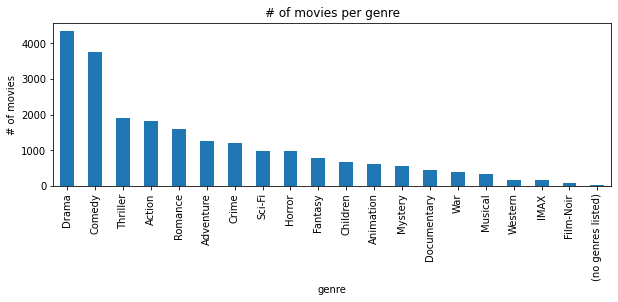

In [103]:
# Genres
all_genres = [s.split("|") for s in genres[genres.genres.notnull()].genres]
genres = [item for l in all_genres for item in l ]
unique_genres = set(genres)
print (f"total of {len(unique_genres)} unique genres from {len(genres)} occurances.")
pd.Series(genres).value_counts().plot(kind='bar', figsize=(10, 3))
plt.title("# of movies per genre")
plt.ylabel("# of movies")
plt.xlabel("genre")
plt.show()

Total of 117 uinque years from 1000 to 3000


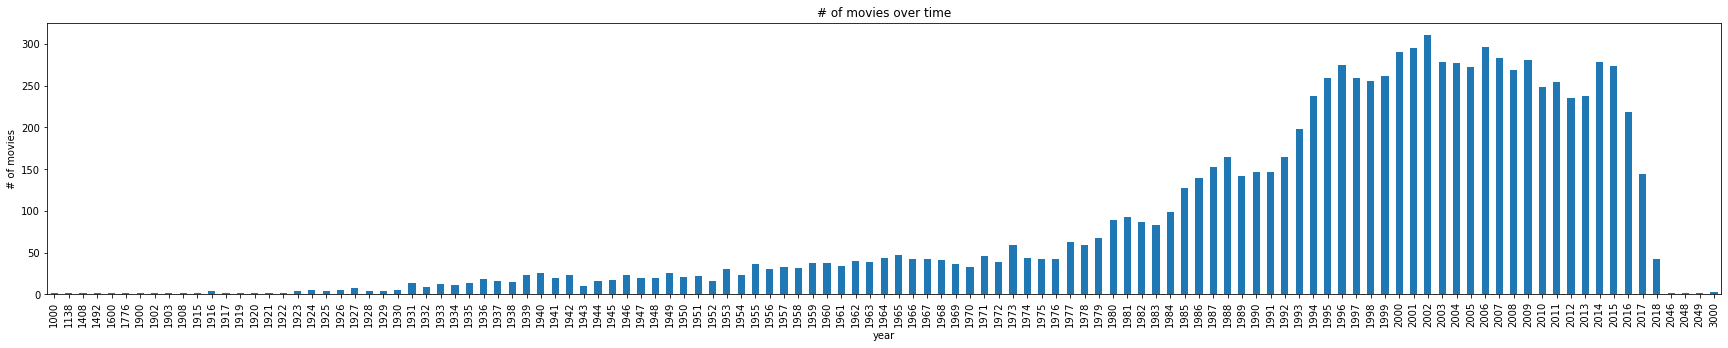

In [104]:
# Years
years = movies[movies.year.notnull()].year # get rows where year is not None
print (f"Total of {len(set(years))} uinque years from {min(years)} to {max(years)}")
pd.Series(years).value_counts().sort_index().plot(kind='bar', figsize=(30, 5))
plt.title("# of movies over time")
plt.ylabel("# of movies")
plt.xlabel("year")
plt.show()

count    100836.000000
mean     3.501557     
std      1.042529     
min      0.500000     
25%      3.000000     
50%      3.500000     
75%      4.000000     
max      5.000000     
Name: rating, dtype: float64


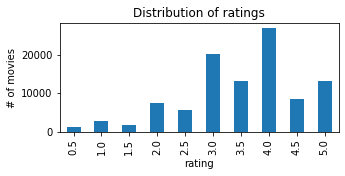

In [88]:
# Distribution of ratings
print (ratings['rating'].describe())
pd.Series(ratings['rating']).value_counts().sort_index().plot(kind='bar', figsize=(5, 2))
plt.title("Distribution of ratings")
plt.ylabel("# of movies")
plt.xlabel("rating")
plt.show()

# Collaborative Based Filtering
- this method involves taking the view of a group of users.
- For the implementation, I have taken the userid=1(I'm making recommendation for user-1), we can make recommendation to anyone.

In [18]:
#this function takes user id of the user for which we want to recommend movies to
def user_recommendation(userid):
  for_user_1=ratings[ratings.userId==1].head()
  for_user_1
  return for_user_1

In [19]:
# we are recommending movies to user-1 only for now, but it can be for any userid.
for_user_1=user_recommendation(1)
for_user_1.merge(movies)

,userId,movieId,rating,title,year
0,1,1,4.0,Toy Story,1995
1,1,3,4.0,Grumpier Old Men,1995
2,1,6,4.0,Heat,1995
3,1,47,5.0,Seven (a.k.a. Se7en),1995
4,1,50,5.0,"Usual Suspects, The",1995


In [20]:
user_1=for_user_1.merge(movies)[['movieId','title','year','rating']]
user_1.head()

,movieId,title,year,rating
0,1,Toy Story,1995,4.0
1,3,Grumpier Old Men,1995,4.0
2,6,Heat,1995,4.0
3,47,Seven (a.k.a. Se7en),1995,5.0
4,50,"Usual Suspects, The",1995,5.0


In [21]:
#user 1 has seen this movies so we need to match users who have also seen this movies


In [22]:
collected_movies=ratings[ratings['movieId'].isin(user_1['movieId'])]
collected_movies.head(-20)

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
...,...,...,...
95114,600,47,4.0
95864,601,1,4.0
95865,601,47,4.0
95866,601,50,5.0


In [23]:
#removing user_id=1 from the group but i think it should be there in the group as this group is the list of users who have shared interest have watched similiar movies
user_id=1
users=collected_movies.userId.values
#print(users[~np.in1d(users,user_id)])

In [24]:
check_=ratings[ratings['movieId'].isin(user_1['movieId'])]
check_.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [25]:
a_=collected_movies.groupby(['userId'])
a_.get_group(600)
ans=sorted(a_,  key=lambda x: len(x[1]), reverse=True)
#ans[:3]

In [26]:
modified_dataset=ans[:100]
userSubsetGroup=modified_dataset

In [27]:
#Store the Pearson Correlation in a dictionary, where the key is the user Id and the value is the coefficient
pearsonCorDict = {}

#For every user group in our subset
for name, group in userSubsetGroup:
    #Let's start by sorting the input and current user group so the values aren't mixed up later on
    group = group.sort_values(by='movieId')
    user_1 = user_1.sort_values(by='movieId')
    #Get the N for the formula
    n = len(group)
    #Get the review scores for the movies that they both have in common
    temp = user_1[user_1['movieId'].isin(group['movieId'].tolist())]
    #And then store them in a temporary buffer variable in a list format to facilitate future calculations
    tempRatingList = temp['rating'].tolist()
    #put the current user group reviews in a list format
    tempGroupList = group['rating'].tolist()
    #Now let's calculate the pearson correlation between two users, so called, x and y
    Sxx = sum([i**2 for i in tempRatingList]) - pow(sum(tempRatingList),2)/float(n)
    Syy = sum([i**2 for i in tempGroupList]) - pow(sum(tempGroupList),2)/float(n)
    Sxy = sum( i*j for i, j in zip(tempRatingList, tempGroupList)) - sum(tempRatingList)*sum(tempGroupList)/float(n)
    
    #If the denominator is different than zero, then divide, else, 0 correlation.
    if Sxx != 0 and Syy != 0:
        pearsonCorDict[name] = Sxy/np.sqrt(Sxx*Syy)
    else:
        pearsonCorDict[name] = 0

In [28]:
pearsonDF = pd.DataFrame.from_dict(pearsonCorDict, orient='index')
pearsonDF.columns = ['similarityIndex']
pearsonDF['userId'] = pearsonDF.index
pearsonDF.index = range(len(pearsonDF))
pearsonDF.head()

,similarityIndex,userId
0,1.000000,1
1,-0.210042,64
2,0.408248,68
3,0.361158,91
4,0.080064,217


In [29]:
topUsers=pearsonDF.sort_values(by='similarityIndex', ascending=False)[0:50]
topUsers.head()

,similarityIndex,userId
89,1.0,339
86,1.0,322
66,1.0,178
97,1.0,425
70,1.0,226


In [30]:
topUsersRating=topUsers.merge(ratings, left_on='userId', right_on='userId', how='inner')
topUsersRating.head()

,similarityIndex,userId,movieId,rating
0,1.0,339,1,4.0
1,1.0,339,6,4.0
2,1.0,339,16,4.5
3,1.0,339,32,3.0
4,1.0,339,47,4.5


In [31]:
#Multiplies the similarity by the user's ratings
topUsersRating['weightedRating'] = topUsersRating['similarityIndex']*topUsersRating['rating']
topUsersRating.head()

,similarityIndex,userId,movieId,rating,weightedRating
0,1.0,339,1,4.0,4.0
1,1.0,339,6,4.0,4.0
2,1.0,339,16,4.5,4.5
3,1.0,339,32,3.0,3.0
4,1.0,339,47,4.5,4.5


In [32]:
#Applies a sum to the topUsers after grouping it up by userId
tempTopUsersRating = topUsersRating.groupby('movieId').sum()[['similarityIndex','weightedRating']]
tempTopUsersRating.columns = ['sum_similarityIndex','sum_weightedRating']
tempTopUsersRating.head()


,sum_similarityIndex,sum_weightedRating
movieId,,
1,28.039585,97.708293
2,18.651989,55.060912
3,11.592187,34.128688
5,6.631096,19.473516
6,26.055925,94.375302


In [33]:
#Creates an empty dataframe
recommendation_df = pd.DataFrame()
#Now we take the weighted average
recommendation_df['weighted average recommendation score'] = tempTopUsersRating['sum_weightedRating']/tempTopUsersRating['sum_similarityIndex']
recommendation_df['movieId'] = tempTopUsersRating.index
recommendation_df.head()

,weighted average recommendation score,movieId
movieId,,
1,3.484655,1
2,2.952013,2
3,2.944111,3
5,2.936697,5
6,3.622028,6


In [34]:
recommendation_df = recommendation_df.sort_values(by='weighted average recommendation score', ascending=False)
recommendation_df.head(10)

,weighted average recommendation score,movieId
movieId,,
26849,5.0,26849
6818,5.0,6818
166183,5.0,166183
5137,5.0,5137
8968,5.0,8968
131237,5.0,131237
165959,5.0,165959
5328,5.0,5328
74685,5.0,74685


In [35]:
!pip install scikit-surprise

     |████████████████████████████████| 11.8MB 7.5MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp36-cp36m-linux_x86_64.whl size=1670936 sha256=6891737eab9aa2feb5615fd024356c1ac80be17950d77e51077735848f04c915
  Stored in directory: /root/.cache/pip/wheels/78/9c/3d/41b419c9d2aff5b6e2b4c0fc8d25c538202834058f9ed110d0
Successfully built scikit-surprise


In [36]:
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate

# A reader is still needed but only the rating_scale param is requiered.
reader = Reader(rating_scale=(1, 5))

# The columns must correspond to user id, item id and ratings (in that order).
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

In [37]:
import surprise
from surprise import SVD
from surprise import SVDpp
from surprise import KNNBasic
from surprise import NMF
from surprise import CoClustering
from surprise import SlopeOne
from surprise.model_selection import cross_validate


algo1 = SVD()
algo2 = KNNBasic()
algo3 = NMF()
algo4 = CoClustering()
algo5 = SlopeOne()

# Run 5-fold cross-validation and print results
algo1_dict = cross_validate(algo1, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)
algo2_dict = cross_validate(algo2, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)
algo3_dict = cross_validate(algo3, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)
algo4_dict = cross_validate(algo4, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)
algo5_dict = cross_validate(algo5, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


In [38]:
print(np.arange(float(4)))

[0. 1. 2. 3.]


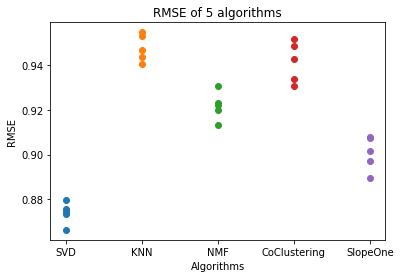

In [39]:
import matplotlib.pyplot as plt

algos = ['SVD', 'KNN', 'NMF', 'CoClustering', 'SlopeOne']
x_pos = np.arange(float(len(algos)))

Y = [algo1_dict['test_rmse'], algo2_dict['test_rmse'], algo3_dict['test_rmse'], algo4_dict['test_rmse'], algo5_dict['test_rmse']]
for y in range(len(Y)):
  plt.title('RMSE of 5 algorithms')
  plt.xlabel('Algorithms')
  plt.ylabel('RMSE')
  plt.scatter([algos[y], algos[y], algos[y], algos[y], algos[y]], Y[y], marker='o')


# These are the recommended movies for user-1
similarly we can repeat this for any userid

In [40]:
movies.loc[movies['movieId'].isin(recommendation_df.head(10)['movieId'].tolist())]


,movieId,title,year
3719,5137,Scratch,2001
3807,5328,Rain,2001
4590,6818,Come and See (Idi i smotri),1985
5379,8968,After the Sunset,2004
5586,26849,"Stand, The",1994
7065,69529,Home,2009
7271,74685,"Crazies, The",2010
8821,131237,What Men Talk About,2010
9423,165959,Alesha Popovich and Tugarin the Dragon,2004
9427,166183,Junior and Karlson,1968


# content based filtering

It is recommended that we have a pre-existing profile for a user.
This algorithm doesn't recommends movies to a new user.
In content based filtering we have to know the content of
both user and item. Usually we construct user-profile and
item-profile using the content of shared attribute space. For
example, for a movie, you represent it with the movie stars in
it and the genres. For user profile, you can do the same thing
based on the users likes some movie stars/genres etc.

In [41]:
genres.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [42]:
set(genres.genres.values)
all_genres=set()
#genres.genres.values=='(no genres listed)'
genres_list=[i.split('|') for i in genres.genres.values]
[all_genres.add(item) for genre in genres_list for item in genre]
#all_genres.remove('(no genres listed)')
all_genres


{'(no genres listed)',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

In [43]:
for i in all_genres:
  genres[i]=0
genres.head()
for i in range(len(genres)):
  values=genres.iloc[i].genres.split('|')
  for val in values:
    genres[val].iloc[i]=1

genres.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,movieId,title,genres,Comedy,Western,Action,War,Documentary,Sci-Fi,(no genres listed),Adventure,Animation,Fantasy,Thriller,IMAX,Drama,Film-Noir,Children,Romance,Musical,Horror,Mystery,Crime
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#let's assume that user 1 has watched these 100 movies and we try to recommend him more movies and try to see if our recommendation matched his watched movies.

- Here we made and assumption that if he gave a rating that means he watched the movie
- Here we took userid=1, that is we make recommendation for user-1. We can make recommendation to any user.

In [44]:
#let's predict for userid-1, we can do this for any user-id
user_1=ratings[ratings['userId']==1][:100]

In [45]:
user_1.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [46]:
movies_he_watched=user_1.movieId.values
#movies_he_watched

In [47]:
other_users=ratings[ratings.movieId.isin(movies_he_watched)]
other_users.drop(other_users[other_users['userId']==1].index,inplace=True)
other_users.head()
genres_liked_by_user_1=genres[genres['movieId'].isin(movies_he_watched)].genres
user_1_genres=set()
#genres_liked_by_user_1.values
for i in genres_liked_by_user_1:
  for j in i.split('|'):
    user_1_genres.add(j)
user_1_genres=np.array(list(user_1_genres))



/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [48]:
user_1_genres

array(['Comedy', 'Western', 'Action', 'War', 'Sci-Fi', 'Adventure',
       'Animation', 'Fantasy', 'Thriller', 'Drama', 'Children', 'Romance',
       'Musical', 'Horror', 'Mystery', 'Crime'], dtype='<U9')

In [49]:
other_users.head()

,userId,movieId,rating
233,2,333,4.0
262,3,527,0.5
272,3,1275,3.5
303,4,47,2.0
316,4,235,2.0


# Recommending userid1 movies he hasn't watched yet based on his likings

In [50]:
pd.set_option('display.max_colwidth', -1) #to display full title
movies_recommended=genres[genres.genres.isin(user_1_genres)].merge(ratings).sort_values(['rating'],ascending=False)
movies_recommended.drop_duplicates(subset='title', keep="last",inplace=True)
movies_recommended['year']=movies_recommended['title'].str.extract('(\d\d\d\d)')
movies_recommended['title']=movies_recommended['title'].str.replace('((\d\d\d\d))','')
movies_recommended['title']=movies_recommended['title'].apply(lambda x:x.replace('()',''))
movies_recommended.head(10)[['movieId','title','rating','year']]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


,movieId,title,rating,year
9333,3942,Sorority House Massacre II,5.0,1990
9332,3941,Sorority House Massacre,5.0,1986
9331,3940,Slumber Party Massacre III,5.0,1990
9330,3939,Slumber Party Massacre II,5.0,1987
10208,4402,Dr. Goldfoot and the Bikini Machine,5.0,1965
2683,626,"Thin Line Between Love and Hate, A",5.0,1996
2684,633,Denise Calls Up,5.0,1995
9537,3951,Two Family House,5.0,2000
8568,3496,Madame Sousatzka,5.0,1988
8549,3473,Jonah Who Will Be 25 in the Year (Jonas qui aura 25 ans en l'an ),5.0,2000


user profile for user 1

In [51]:
user1=ratings[ratings['userId']==1]

In [52]:
movie_profile=user1.merge(genres,on="movieId")

In [53]:
movie_profile.head()

,userId,movieId,rating,title,genres,Comedy,Western,Action,War,Documentary,Sci-Fi,(no genres listed),Adventure,Animation,Fantasy,Thriller,IMAX,Drama,Film-Noir,Children,Romance,Musical,Horror,Mystery,Crime
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0
1,1,3,4.0,Grumpier Old Men (1995),Comedy|Romance,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,1,6,4.0,Heat (1995),Action|Crime|Thriller,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,1,47,5.0,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,1,50,5.0,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1


In [54]:
movie_profile.drop(['genres','rating','title','userId'],axis=1,inplace=True)

In [55]:
df = movie_profile.sum()
print(df)
idf = (len(movies)/df).apply(np.log) #log inverse of DF

movieId               430268
Comedy                83    
Western               7     
Action                90    
War                   22    
Documentary           0     
Sci-Fi                40    
(no genres listed)    0     
Adventure             85    
Animation             29    
Fantasy               47    
Thriller              55    
IMAX                  0     
Drama                 68    
Film-Noir             1     
Children              42    
Romance               26    
Musical               22    
Horror                17    
Mystery               18    
Crime                 45    
dtype: int64


In [56]:
df

movieId               430268
Comedy                83    
Western               7     
Action                90    
War                   22    
Documentary           0     
Sci-Fi                40    
(no genres listed)    0     
Adventure             85    
Animation             29    
Fantasy               47    
Thriller              55    
IMAX                  0     
Drama                 68    
Film-Noir             1     
Children              42    
Romance               26    
Musical               22    
Horror                17    
Mystery               18    
Crime                 45    
dtype: int64

In [57]:
idf.drop(['movieId'],axis=0,inplace=True)

In [58]:
idf

Comedy                4.765361
Western               7.238292
Action                4.684392
War                   6.093159
Documentary           inf     
Sci-Fi                5.495322
(no genres listed)    inf     
Adventure             4.741550
Animation             5.816906
Fantasy               5.334054
Thriller              5.176869
IMAX                  inf     
Drama                 4.964694
Film-Noir             9.184202
Children              5.446532
Romance               5.926105
Musical               6.093159
Horror                6.350988
Mystery               6.293830
Crime                 5.377539
dtype: float64

In [59]:
idf=idf.replace(np.inf,0)

In [60]:
idf

Comedy                4.765361
Western               7.238292
Action                4.684392
War                   6.093159
Documentary           0.000000
Sci-Fi                5.495322
(no genres listed)    0.000000
Adventure             4.741550
Animation             5.816906
Fantasy               5.334054
Thriller              5.176869
IMAX                  0.000000
Drama                 4.964694
Film-Noir             9.184202
Children              5.446532
Romance               5.926105
Musical               6.093159
Horror                6.350988
Mystery               6.293830
Crime                 5.377539
dtype: float64

In [61]:
movie_profile.drop(['movieId'],axis=1,inplace=True)
TFIDF = movie_profile.mul(idf.values)
TFIDF

,Comedy,Western,Action,War,Documentary,Sci-Fi,(no genres listed),Adventure,Animation,Fantasy,Thriller,IMAX,Drama,Film-Noir,Children,Romance,Musical,Horror,Mystery,Crime
0,4.765361,0.0,0.000000,0.000000,0.0,0.000000,0.0,4.74155,5.816906,5.334054,0.000000,0.0,0.000000,0.0,5.446532,0.000000,0.0,0.0,0.00000,0.000000
1,4.765361,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,5.926105,0.0,0.0,0.00000,0.000000
2,0.000000,0.0,4.684392,0.000000,0.0,0.000000,0.0,0.00000,0.000000,0.000000,5.176869,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.00000,5.377539
3,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.00000,0.000000,0.000000,5.176869,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,6.29383,0.000000
4,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.00000,0.000000,0.000000,5.176869,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,6.29383,5.377539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,0.000000,0.0,4.684392,0.000000,0.0,0.000000,0.0,0.00000,0.000000,0.000000,5.176869,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.00000,5.377539
228,0.000000,0.0,4.684392,0.000000,0.0,5.495322,0.0,4.74155,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.000000
229,4.765361,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.000000
230,0.000000,0.0,0.000000,0.000000,0.0,5.495322,0.0,4.74155,5.816906,0.000000,0.000000,0.0,0.000000,0.0,5.446532,0.000000,0.0,0.0,0.00000,0.000000


In [62]:
user_x_profile=pd.DataFrame()
userid=set(ratings.userId.values)
userid
for i in userid:
  user_x_profile[i]=0
#user_x_profile.columns=[i for i in userid]
for i in range(len(ratings)):
  user_x_profile[ratings.iloc[i].userId]=ratings.iloc[i].rating

In [64]:
user_x_movie = pd.pivot_table(ratings, values='rating', index=['movieId'], columns = ['userId'])

In [65]:
user_x_movie.head()

userId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.5,NaN,4.5,3.5,4.0,NaN,3.5,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,5.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,...,NaN,4.0,5.0,NaN,NaN,NaN,NaN,NaN,4.0,3.0,NaN,NaN,NaN,5.0,NaN,NaN,5.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,4.0,4.0,NaN,3.0,2.5,4.0,NaN,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,3.0,3.5,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,2.5,NaN,4.0,NaN,4.0,NaN,NaN,NaN,NaN,2.5,4.0,NaN,4.0,NaN,5.0,3.5,NaN,NaN,2.0,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,3.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
user_x_movie.sort_index(axis=0, inplace=True)
user_x_movie

userId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.5,NaN,4.5,3.5,4.0,NaN,3.5,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,5.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,...,NaN,4.0,5.0,NaN,NaN,NaN,NaN,NaN,4.0,3.0,NaN,NaN,NaN,5.0,NaN,NaN,5.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,4.0,4.0,NaN,3.0,2.5,4.0,NaN,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,3.0,3.5,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,2.5,NaN,4.0,NaN,4.0,NaN,NaN,NaN,NaN,2.5,4.0,NaN,4.0,NaN,5.0,3.5,NaN,NaN,2.0,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,3.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193585,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
from tqdm import tqdm

userIDs = user_x_movie.columns
user_profile = pd.DataFrame(columns = movie_profile.columns)

for i in tqdm(range(len(user_x_movie.columns))):
  working_df = movie_profile.mul(user_x_movie.iloc[:,i], axis=0)  
  user_profile.loc[userIDs[i]] = working_df.mean(axis=0)

100%|██████████| 610/610 [00:02<00:00, 224.37it/s]


In [68]:
user_profile

,Comedy,Western,Action,War,Documentary,Sci-Fi,(no genres listed),Adventure,Animation,Fantasy,Thriller,IMAX,Drama,Film-Noir,Children,Romance,Musical,Horror,Mystery,Crime
1,2.285714,0.000000,1.142857,0.357143,0.0,1.285714,0.0,1.785714,0.357143,0.714286,0.285714,0.0,0.714286,0.0,0.357143,1.285714,0.357143,0.000000,0.285714,0.642857
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.000000,0.500000,0.500000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.500000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,1.066667,0.200000,0.600000,0.000000,0.0,0.533333,0.0,1.200000,0.200000,1.000000,0.466667,0.0,0.866667,0.0,0.733333,0.333333,0.200000,0.600000,0.533333,0.400000
5,1.800000,0.000000,0.800000,0.000000,0.0,0.300000,0.0,1.500000,0.700000,0.600000,0.800000,0.0,0.700000,0.0,1.100000,0.800000,0.400000,0.700000,0.000000,0.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,1.395349,0.093023,1.406977,0.453488,0.0,0.895349,0.0,1.418605,0.197674,0.232558,0.476744,0.0,1.209302,0.0,0.267442,0.511628,0.197674,0.081395,0.174419,0.627907
607,1.857143,0.000000,1.000000,0.357143,0.0,0.000000,0.0,0.857143,0.000000,0.642857,1.142857,0.0,1.214286,0.0,0.000000,0.285714,0.000000,0.571429,0.142857,0.928571
608,0.928571,0.265306,1.102041,0.183673,0.0,0.591837,0.0,0.785714,0.214286,0.520408,0.632653,0.0,0.908163,0.0,0.336735,0.346939,0.153061,0.244898,0.102041,0.602041
609,1.500000,0.400000,0.700000,0.300000,0.0,0.000000,0.0,1.200000,0.300000,0.900000,0.000000,0.0,0.600000,0.0,0.300000,1.000000,0.300000,0.300000,0.000000,0.000000


In [69]:
df = movie_profile.sum()
idf = (len(movies)/df).apply(np.log) #log inverse of DF

In [70]:
df

Comedy                83
Western               7 
Action                90
War                   22
Documentary           0 
Sci-Fi                40
(no genres listed)    0 
Adventure             85
Animation             29
Fantasy               47
Thriller              55
IMAX                  0 
Drama                 68
Film-Noir             1 
Children              42
Romance               26
Musical               22
Horror                17
Mystery               18
Crime                 45
dtype: int64

In [71]:
idf

Comedy                4.765361
Western               7.238292
Action                4.684392
War                   6.093159
Documentary           inf     
Sci-Fi                5.495322
(no genres listed)    inf     
Adventure             4.741550
Animation             5.816906
Fantasy               5.334054
Thriller              5.176869
IMAX                  inf     
Drama                 4.964694
Film-Noir             9.184202
Children              5.446532
Romance               5.926105
Musical               6.093159
Horror                6.350988
Mystery               6.293830
Crime                 5.377539
dtype: float64

In [72]:
idf.replace(np.inf,0)

Comedy                4.765361
Western               7.238292
Action                4.684392
War                   6.093159
Documentary           0.000000
Sci-Fi                5.495322
(no genres listed)    0.000000
Adventure             4.741550
Animation             5.816906
Fantasy               5.334054
Thriller              5.176869
IMAX                  0.000000
Drama                 4.964694
Film-Noir             9.184202
Children              5.446532
Romance               5.926105
Musical               6.093159
Horror                6.350988
Mystery               6.293830
Crime                 5.377539
dtype: float64

In [73]:
TFIDF = movie_profile.mul(idf.values)
TFIDF

,Comedy,Western,Action,War,Documentary,Sci-Fi,(no genres listed),Adventure,Animation,Fantasy,Thriller,IMAX,Drama,Film-Noir,Children,Romance,Musical,Horror,Mystery,Crime
0,4.765361,0.0,0.000000,0.000000,NaN,0.000000,NaN,4.74155,5.816906,5.334054,0.000000,NaN,0.000000,0.0,5.446532,0.000000,0.0,0.0,0.00000,0.000000
1,4.765361,0.0,0.000000,0.000000,NaN,0.000000,NaN,0.00000,0.000000,0.000000,0.000000,NaN,0.000000,0.0,0.000000,5.926105,0.0,0.0,0.00000,0.000000
2,0.000000,0.0,4.684392,0.000000,NaN,0.000000,NaN,0.00000,0.000000,0.000000,5.176869,NaN,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.00000,5.377539
3,0.000000,0.0,0.000000,0.000000,NaN,0.000000,NaN,0.00000,0.000000,0.000000,5.176869,NaN,0.000000,0.0,0.000000,0.000000,0.0,0.0,6.29383,0.000000
4,0.000000,0.0,0.000000,0.000000,NaN,0.000000,NaN,0.00000,0.000000,0.000000,5.176869,NaN,0.000000,0.0,0.000000,0.000000,0.0,0.0,6.29383,5.377539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,0.000000,0.0,4.684392,0.000000,NaN,0.000000,NaN,0.00000,0.000000,0.000000,5.176869,NaN,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.00000,5.377539
228,0.000000,0.0,4.684392,0.000000,NaN,5.495322,NaN,4.74155,0.000000,0.000000,0.000000,NaN,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.000000
229,4.765361,0.0,0.000000,0.000000,NaN,0.000000,NaN,0.00000,0.000000,0.000000,0.000000,NaN,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.000000
230,0.000000,0.0,0.000000,0.000000,NaN,5.495322,NaN,4.74155,5.816906,0.000000,0.000000,NaN,0.000000,0.0,5.446532,0.000000,0.0,0.0,0.00000,0.000000


In [74]:
df_predict = pd.DataFrame()

for i in tqdm(range(len(user_x_movie.columns))):
  working_df = TFIDF.mul(user_profile.iloc[i], axis=1)
  df_predict[user_x_movie.columns[i]] = working_df.sum(axis=1)

100%|██████████| 610/610 [00:00<00:00, 782.37it/s]


In [75]:
df_predict.index.name="movieId"

In [76]:
df_predict

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,27.192003,0.0,0.000000,21.264471,28.953428,19.209448,30.151182,27.775766,15.805168,0.0,26.217573,50.690409,26.670271,16.838037,10.169256,18.301511,29.214576,17.574085,14.204283,5.432521,14.620529,20.151209,22.160487,30.277261,19.061444,13.853122,7.616741,15.071537,35.827198,23.826806,12.422961,25.121367,25.892657,7.593624,41.647557,0.000000,28.081929,19.528479,28.848001,17.833418,...,4.749487,21.186873,22.673072,21.016880,0.0,16.678764,43.098605,0.0,14.959842,17.815223,0.0,0.0,56.941479,19.701348,22.310750,19.442862,26.896335,15.960372,15.964196,15.188538,14.248462,19.411975,23.783662,25.265823,56.31719,32.752811,24.658557,0.0,13.343052,15.376019,32.238284,21.239822,21.088289,15.785751,16.717378,17.222688,16.343177,14.006884,21.017582,28.996008
1,18.511532,0.0,0.000000,7.058420,13.318534,8.958409,13.434609,9.652882,5.926105,0.0,17.306334,22.238352,29.630526,8.243359,9.494007,5.185342,13.322878,12.490715,5.396653,3.569650,10.755623,11.852210,14.255288,16.197591,19.061444,9.374554,5.796310,8.842476,8.339382,23.826806,14.397858,8.279490,11.241329,7.355714,12.017239,0.000000,15.487424,9.463793,5.926105,6.937101,...,1.588454,14.924399,16.892528,16.793261,0.0,37.420132,18.083895,0.0,14.959366,11.383371,0.0,0.0,15.843742,11.721357,4.765361,17.723434,14.397858,10.920017,9.370331,10.478780,4.765361,10.786092,9.853622,8.758304,0.00000,11.302435,11.931463,0.0,7.841695,7.610809,22.156762,10.008676,10.582165,7.271549,10.874770,9.681302,10.543129,6.480974,13.074147,18.362632
2,10.289686,0.0,2.342196,7.377523,12.191040,16.117738,15.470114,8.343152,25.968377,0.0,16.153521,0.000000,0.000000,11.546232,0.936878,6.049732,5.415076,19.969136,9.271085,15.573399,21.723411,10.539882,9.378468,15.284838,0.000000,16.411512,24.622110,11.920170,22.634745,0.000000,19.544566,15.126575,10.513477,13.821862,7.619400,12.942171,19.048500,9.799766,0.000000,15.928683,...,10.159200,15.126759,18.348036,9.961596,0.0,18.119040,4.302031,0.0,11.710411,15.304384,0.0,0.0,10.554408,17.648095,19.610146,12.191040,4.328063,12.988632,21.249756,13.805844,9.368784,14.395473,13.673693,15.281114,0.00000,7.326625,10.938856,0.0,10.515026,13.281238,0.000000,12.710054,15.775996,17.529992,12.972991,12.435467,15.594243,11.675051,3.279074,11.819570
3,3.277342,0.0,0.000000,5.772581,4.141495,8.209808,4.141495,2.740695,10.353737,0.0,5.176869,0.000000,0.000000,7.874224,0.000000,0.000000,0.000000,6.998971,4.315427,5.176869,7.506459,0.000000,3.451246,4.529760,0.000000,5.752076,15.860838,4.950049,9.059520,0.000000,10.274957,8.153228,3.446684,1.035374,5.735349,12.942171,6.471086,4.509930,0.000000,6.385406,...,3.451246,6.554685,7.609553,2.588434,0.0,18.119040,0.000000,0.0,2.218658,4.900300,0.0,0.0,11.470698,5.361757,5.176869,4.141495,3.823566,4.917504,8.412411,6.116842,0.000000,4.449983,5.916421,6.252435,0.00000,2.588434,5.398822,0.0,4.556268,5.372337,0.000000,5.025655,7.002345,7.293181,2.588434,3.565803,6.815540,3.917389,0.000000,6.290491
4,6.734332,0.0,0.000000,7.923597,8.443526,12.599636,8.443526,5.587628,10.353737,0.0,11.043275,0.000000,0.000000,10.562994,0.000000,6.049732,3.072880,15.603034,6.797368,10.554408,14.228383,0.000000,7.036272,15.284838,0.000000,11.727120,26.615917,9.220447,14.437059,0.000000,15.054992,13.960971,7.113188,2.110882,8.424119,12.942171,13.193010,7.582810,0.000000,10.738652,...,7.036272,12.700444,14.907642,5.277204,0.0,18.119040,4.302031,0.0,8.364417,10.546716,0.0,0.0,16.848238,11.123406,15.394193,8.443526,3.823566,9.697538,17.150913,10.896877,0.000000,8.960177,8.989301,9.453351,0.00000,5.277204,8.585512,0.0,7.385077,9.405491,0.000000,9.348775,12.285542,13.605945,5.277204,6.942397,11.808969,7.154887,0.000000,14

In [77]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
df_predict = min_max_scaler.fit_transform(df_predict)
df_predict = df_predict * 5
df_predict = pd.DataFrame(df_predict)

In [78]:
for i in df_predict.index:
   if i not in user_x_movie.index:
     df_predict.drop(i, inplace=True)

In [79]:
for i in user_x_movie.index:
   if i not in df_predict.index:
     user_x_movie.drop(i, inplace=True)

In [80]:
import numpy.ma as ma
import scipy

mask = ma.array(df_predict, mask=user_x_movie.isnull())

In [81]:
rmse = []
user_x_movie=pd.DataFrame(user_x_movie)
df_predict=pd.DataFrame(df_predict)
for i in range(user_x_movie.shape[0]):
   for j in range(user_x_movie.shape[1]):
     if pd.isna(user_x_movie.iloc[i,j]) is not True:
       rmse.append(user_x_movie.iloc[i,j] - df_predict.iloc[i,j])


In [82]:
print('RMSE of content-based recommendation system is: ', np.sqrt(np.mean([_**2 for _ in rmse])) / 5)

RMSE of content-based recommendation system is:  0.3635550854122861


In [83]:
  def recommender(user_no):

    user_predicted_rating = pd.DataFrame(df_predict[df_predict.columns[user_no - 1]])
    user_rating_film = pd.merge(df_predict, movies, left_on=df_predict.index, right_on='movieId')
    already_watched = ratings[ratings['userId'].isin([user_no])]['movieId']

    #recommendation without films being watched by user
    all_rec = user_rating_film[~user_rating_film.index.isin(already_watched)]
    return all_rec.sort_values(by=[user_no], ascending=False).iloc[:][['movieId', 'title']]

# Movies recommended by the Content Based Filtering

In [84]:
# Passing the same userid that we took into consideration before. We made user_profile for userid-1
recommender(1)


,movieId,title
0,1,Toy Story
136,163,Desperado
127,154,Beauty of the Day (Belle de jour)
128,155,Beyond Rangoon
129,156,Blue in the Face
...,...,...
69,77,Nico Icon
71,79,"Juror, The"
72,80,"White Balloon, The (Badkonake sefid)"
73,81,Things to Do in Denver When You're Dead


In [85]:
print(Y[0])

[0.86630024 0.87437503 0.8797954  0.87578238 0.87327466]


Text(0.5, 0.98, 'RMSE')

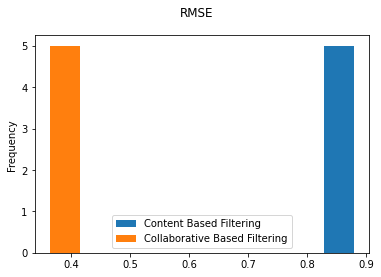

In [86]:
import pylab as pl
df=pd.DataFrame({'Content Based Filtering':Y[0],'Collaborative Based Filtering':np.sqrt(np.mean([_**2 for _ in rmse])) / 5})
ax=df.plot.hist()
pl.suptitle("RMSE")

# We can observe from the above graph that RMSE of content-based filtering is smaller than the RMSE of collaborative-based filtering.
And it can be proved in general that individual preferences are always better than the group preference.